In [1]:
import os
os.chdir('/Users/melon/Documents/Stat/assignment_1/Data')
os.getcwd()

'/Users/melon/Documents/Stat/assignment_1/Data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
%matplotlib inline

# sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

In [3]:
def clean_data(df , setname = True):
    year = 1990
    df = df.join(regions[['ThirdWorld' , 'Region']])
    cols = df.columns.tolist()
    cols = cols[0:4] + cols[-2:] + cols[4:-2]
    df = df[cols]
    df.replace({'..':np.nan} , inplace=True)
    df = df.dropna()
    
    if setname==True:
        for column in df.columns:
            if (column[-1] == ']'):
                df = df.astype({column:float})
                df.rename(columns={column: str(year)} , inplace=True)
                year = int(year)+1
    return df

In [4]:
regions = pd.read_csv('countries_regions.csv')

In [5]:
gdp = pd.read_csv('gdp.csv')
# gdp_1 = clean_data(gdp)

In [6]:
population = pd.read_csv('population.csv')
# population_1 = clean_data(population)

In [7]:
unemployment = pd.read_csv('unemployment.csv')
# unemployment_1 = clean_data(unemployment)

In [8]:
birthrate = pd.read_csv('birth_rate.csv')
birthrate = birthrate.drop(['2020 [YR2020]'] , axis=1)
# birthrate_1 = clean_data(birthrate)

In [9]:
pop_15_64 = pd.read_csv('pop_15_64.csv')
# pop_15_64_1 = clean_data(pop_15_64)

In [10]:
pop_over_65 = pd.read_csv('pop_over_65.csv')
# pop_over_65_1 = clean_data(pop_over_65)

# Time series (GDP - BirthRate)

In [11]:
gdp_1 = clean_data(gdp)
gdp_plot = gdp_1.melt(id_vars=['Country Name', 'Country Code' , 'Series Name' , 'Series Code' , 'ThirdWorld' , 'Region'] )
gdp_plot = gdp_plot.rename(columns={'variable':'Years' , 'value':'GDP'})

In [12]:
birthrate_1 = clean_data(birthrate)
birthrate_plot = birthrate_1.melt(id_vars=['Country Name', 'Country Code' , 'Series Name' , 'Series Code' , 'ThirdWorld' , 'Region'] )
birthrate_plot = birthrate_plot.rename(columns={'variable':'Years' , 'value':'Birth_Rate'})

Text(0.5, 1.0, 'GDP and Birth_rate')

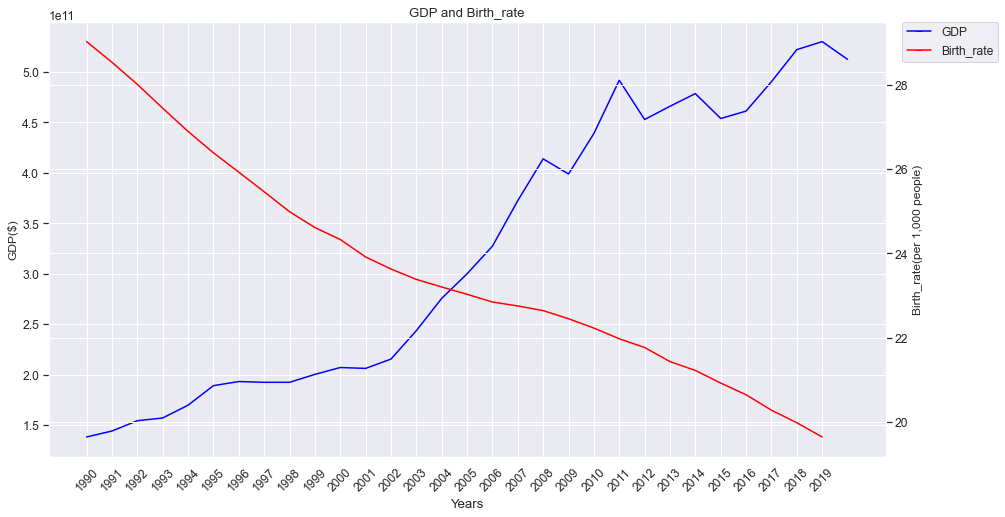

In [64]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = gdp_plot
                  , x ='Years'
                  , y = 'GDP'
                  , color = 'blue'
                  , ci=None)

ax.set_ylabel('GDP($)' , fontsize = 12)

ax2 = ax.twinx()
ax2 = sns.lineplot(data = birthrate_plot
                  , x ='Years'
                  , y = 'Birth_Rate'
                  , color='red'
                  , ci=None)

ax2.set_ylabel('Birth_rate(per 1,000 people)' , fontsize = 12)

ax.legend(handles=[
    Line2D([], [], marker='_', color="blue",label='GDP'),
    Line2D([], [], marker='_', color="red", label='Birth_rate')]
    , bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0
)

ax.tick_params(axis='x', rotation=45)
ax.set_title("GDP and Birth_rate")

# Part-to-Whole (GDP - Population(>65))

In [65]:
df1 = clean_data(gdp)

In [66]:
gdp_2008_2018 = df1[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2008' ,'2018']].copy()

In [67]:
gdp_2008_2018.drop(gdp_2008_2018[gdp_2008_2018.Region == "Thailand"].index , inplace=True)
gdp_2008_2018.drop(gdp_2008_2018[gdp_2008_2018.Region == "Australia and Oceanea"].index , inplace=True)

In [68]:
gdp_2008_2018['Difference'] = gdp_2008_2018['2018'] - gdp_2008_2018['2008']

In [69]:
gdp_2008_2018

,Country Name,Country Code,ThirdWorld,Region,2008,2018,Difference
1,Albania,ALB,0.0,Eastern Europe,1.288135e+10,1.515643e+10,2.275079e+09
2,Algeria,DZA,0.0,Africa,1.710007e+11,1.749109e+11,3.910179e+09
6,Antigua and Barbuda,ATG,0.0,North America,1.370070e+09,1.605944e+09,2.358741e+08
7,Argentina,ARG,0.0,South America,3.615580e+11,5.248197e+11,1.632617e+11
8,Armenia,ARM,0.0,Western Asia,1.166204e+10,1.245794e+10,7.959012e+08
...,...,...,...,...,...,...,...
207,Uruguay,URY,0.0,South America,3.036621e+10,6.451504e+10,3.414883e+10
208,Uzbekistan,UZB,0.0,Western Asia,2.954944e+10,5.263314e+10,2.308370e+10
211,Vietnam,VNM,0.0,Southeast Asia,9.913030e+10,2.452137e+11,1.460834e+11
215,Zambia,ZMB,1.0,Africa,1.791086e+10,2.631159e+10,8.400732e+09


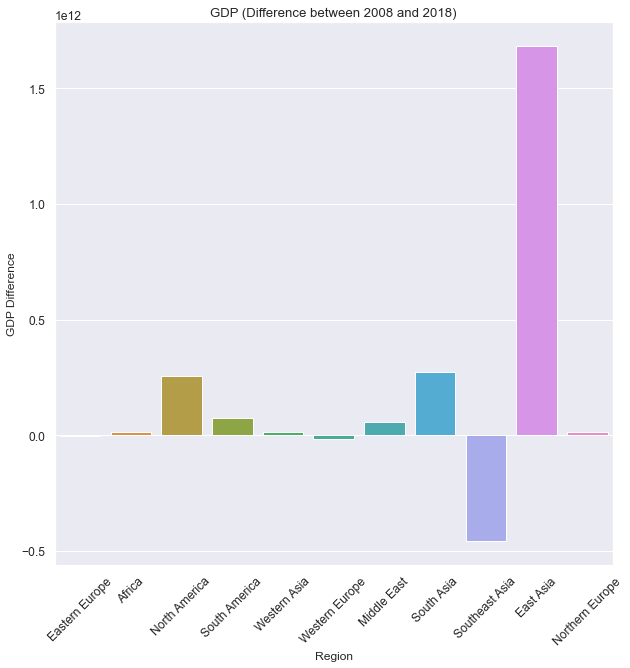

In [104]:
plt.figure(figsize = (10,10))
ax = sns.barplot(data=gdp_2008_2018 , x='Region' , y='Difference' , ci=0)
ax.set_title('GDP (Difference between 2008 and 2018)')
ax.set_xlabel('Region' , fontsize = 12)
ax.set_ylabel('GDP Difference' , fontsize = 12)
ax.tick_params(axis='x', rotation=45)
sns.set(font_scale = 1.1)

In [96]:
df2 = clean_data(population)

In [97]:
pop_65_2008_2018 = df2[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2008' , '2018']].copy()

In [98]:
pop_65_2008_2018.drop(pop_65_2008_2018[pop_65_2008_2018.Region == "Thailand"].index , inplace=True)
pop_65_2008_2018.drop(pop_65_2008_2018[pop_65_2008_2018.Region == "Australia and Oceanea"].index , inplace=True)

In [99]:
pop_65_2008_2018['Difference'] = pop_65_2008_2018['2018'] - pop_65_2008_2018['2008']

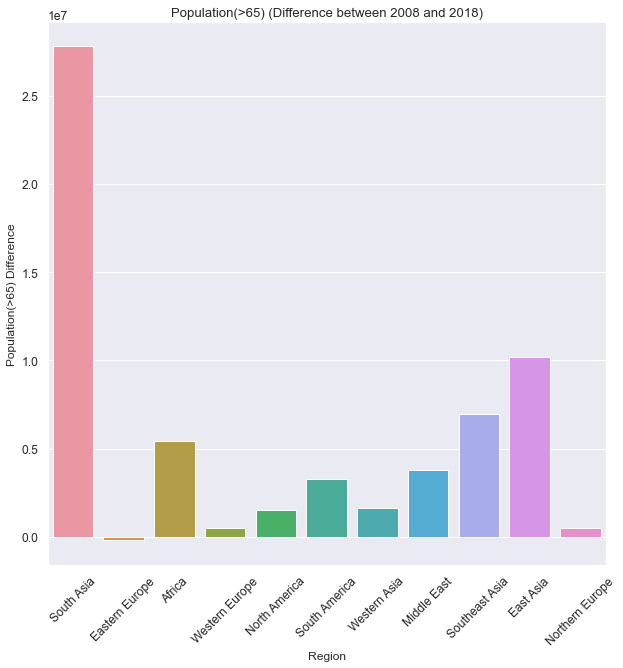

In [105]:
plt.figure(figsize = (10,10))
ax = sns.barplot(data=pop_65_2008_2018 , x='Region' , y='Difference' , ci=0)
ax.set_title('Population(>65) (Difference between 2008 and 2018)')
ax.set_xlabel('Region' , fontsize = 12)
ax.set_ylabel('Population(>65) Difference' , fontsize = 12)
ax.tick_params(axis='x', rotation=45)
sns.set(font_scale = 1.1)

# Geo-visualization (in Excel)

In [107]:
df2 = clean_data(population)
pop2_2008 = df2[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2008']]

In [29]:
pop2_2008.to_csv('pop_2008.csv',index=False)

In [30]:
pop2_2018 = df2[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2018']]

In [31]:
pop2_2018.to_csv('pop_2018.csv',index=False)

In [32]:
df2 = clean_data(birthrate)
birthrate2_2008 = df2[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2008']]

In [33]:
birthrate2_2008

,Country Name,Country Code,ThirdWorld,Region,2008
0,Afghanistan,AFG,1.0,South Asia,41.949
1,Albania,ALB,0.0,Eastern Europe,11.973
2,Algeria,DZA,0.0,Africa,23.226
5,Angola,AGO,1.0,Africa,46.563
6,Antigua and Barbuda,ATG,0.0,North America,17.014
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,0.0,North America,15.800
213,West Bank and Gaza,PSE,0.0,Middle East,33.903
214,"Yemen, Rep.",YEM,1.0,Middle East,35.201
215,Zambia,ZMB,1.0,Africa,42.272


In [34]:
birthrate2_2008.to_csv('birthrate_2008.csv',index=False)

In [35]:
birthrate2_2018 = df2[['Country Name' , 'Country Code' , 'ThirdWorld' , 'Region' , '2018']]

In [36]:
birthrate2_2018.to_csv('birthrate_2018.csv',index=False)